In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_spd_matrix

In [3]:
import sys
sys.path.insert(1, '/Users/ersi/Documents/ott/')

In [4]:
from ott.tools.gaussian_mixture import gaussian_mixture

In [5]:
# from ott.geometry.costs import Bures
from ott.core import bar_problems
from ott.core import continuous_barycenter
d = 2  # dimensionality

In [6]:
key = jax.random.PRNGKey(0)

In [7]:
sample_size = 2000

In [8]:
num_of_components = 3

In [9]:
keys = jax.random.split(key, num=2*num_of_components+3)

In [10]:
d = 2 # dimension

In [11]:
seed = 42

In [12]:
seeds = [2, 5, 12]

# Generate one GMM

In [13]:
means1 = jnp.asarray([jax.random.randint(key=keys[i], shape=(d,), minval=-10, maxval=10) for i in range(num_of_components)])

In [14]:
covs1 = jnp.asarray([make_spd_matrix(n_dim=d, random_state=seeds[i])
                    for i in range(num_of_components)])

In [15]:
means1

DeviceArray([[ 6,  8],
             [ 0, -5],
             [ 0,  1]], dtype=int32)

In [16]:
means1.shape

(3, 2)

In [17]:
covs1

DeviceArray([[[ 2.2550676 , -0.47762507],
              [-0.47762507,  0.495635  ]],

             [[ 2.057648  ,  0.8638142 ],
              [ 0.8638142 ,  1.042507  ]],

             [[ 2.40619   ,  0.56715715],
              [ 0.56715715,  0.5271321 ]]], dtype=float32)

In [18]:
covs1.shape

(3, 2, 2)

In [19]:
# gmm_generator = gaussian_mixture.GaussianMixture.from_random(key=keys[0],
#                                                              n_components=2, n_dimensions=2,  stdev=0.001)

In [20]:
weights1 = jnp.asarray([0.3, 0.3, 0.4]) # auto 8a einai to antistoixo histogram

In [21]:
weights1

DeviceArray([0.3, 0.3, 0.4], dtype=float32)

In [22]:
gmm_generator1 = gaussian_mixture.GaussianMixture.from_mean_cov_component_weights(mean=means1,
                                                                                 cov=covs1,
                                                                                 component_weights=weights1)

In [23]:
samples1 = gmm_generator1.sample(key=keys[-1], size=sample_size)

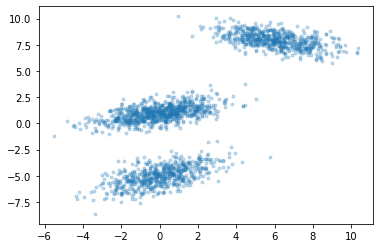

In [24]:
# Plot samples
plt.scatter(samples1[:, 0], samples1[:, 1], marker='.', alpha=0.25)
plt.show()

In [25]:
samples1.shape

(2000, 2)

# Generate second GMM 

In [26]:
means2 = jnp.asarray([jax.random.randint(key=keys[i + num_of_components], shape=(d,), minval=-10, maxval=10) for i in range(num_of_components)])

In [27]:
covs2 = jnp.asarray([make_spd_matrix(n_dim=d, random_state=seeds[i])
                    for i in range(num_of_components)])

In [28]:
weights2 = jnp.asarray([0.3, 0.3, 0.4]) # auto 8a einai to antistoixo histogram

In [29]:
gmm_generator2 = gaussian_mixture.GaussianMixture.from_mean_cov_component_weights(mean=means2,
                                                                                 cov=covs2,
                                                                                 component_weights=weights2)

In [30]:
samples2 = gmm_generator2.sample(key=keys[-2], size=sample_size)

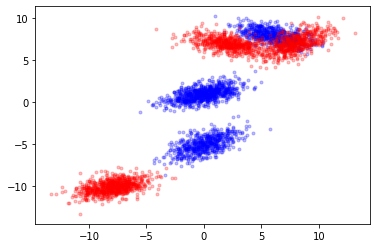

In [31]:
# Plot samples
plt.scatter(samples1[:, 0], samples1[:, 1], marker='.', alpha=0.25, c='b')
plt.scatter(samples2[:, 0], samples2[:, 1], marker='.', alpha=0.25, c='r')
plt.show()

In [32]:
means1[0]

DeviceArray([6, 8], dtype=int32)

In [33]:
covs1[0]

DeviceArray([[ 2.2550676 , -0.47762507],
             [-0.47762507,  0.495635  ]], dtype=float32)

In [34]:
jnp.concatenate((means1[0], jnp.reshape(covs1[0], (d * d, ))))

DeviceArray([ 6.        ,  8.        ,  2.2550676 , -0.47762507,
             -0.47762507,  0.495635  ], dtype=float32)

In [35]:
pointcloud1 = jnp.asarray([jnp.concatenate((means1[i], jnp.reshape(covs1[i], (d * d, )))) for i in range(num_of_components)])

In [36]:
pointcloud1 .shape

(3, 6)

In [37]:
pointcloud2 = jnp.asarray([jnp.concatenate((means2[i], jnp.reshape(covs2[i], (d * d, )))) for i in range(num_of_components)])

In [38]:
pointcloud2 .shape

(3, 6)

In [39]:
y = jnp.concatenate((pointcloud1, pointcloud2))

In [40]:
y.shape

(6, 6)

In [41]:
bar_p = bar_problems.BarycenterProblem(
      y, num_per_segment=jnp.asarray([num_of_components, num_of_components]), num_segments=2, max_measure_size=num_of_components,
      epsilon=0.01)

In [42]:
solver = continuous_barycenter.WassersteinBarycenter()

In [43]:
bar_size = 2
weights_bary = jnp.ones(bar_size) / bar_size
out = solver(bar_p, bar_size=bar_size)

In [44]:
barycenter = out.x

In [45]:
barycenter

DeviceArray([[-4.        , -7.5       ,  2.2319188 ,  0.7154857 ,
               0.7154857 ,  0.7848196 ],
             [ 4.000036  ,  5.75      ,  2.2434921 ,  0.1189383 ,
               0.1189383 ,  0.64023054]], dtype=float32)

In [46]:
bary_mean1 = barycenter[0][0:d]

In [47]:
bary_mean1

DeviceArray([-4. , -7.5], dtype=float32)

In [48]:
bary_cov1 = barycenter[0][d:]

In [49]:
bary_covariance1 = jnp.reshape(bary_cov1, (d, d))

In [50]:
bary_covariance1

DeviceArray([[2.2319188, 0.7154857],
             [0.7154857, 0.7848196]], dtype=float32)

In [51]:
bary_mean2 = barycenter[1][0:d]

In [52]:
bary_covariance2 = jnp.reshape(barycenter[1][d:], (d, d))

In [53]:
means_bary = jnp.asarray([bary_mean1, bary_mean2])

In [54]:
means_bary

DeviceArray([[-4.      , -7.5     ],
             [ 4.000036,  5.75    ]], dtype=float32)

In [55]:
covs_bary = jnp.asarray([bary_covariance1, bary_covariance2])

In [56]:
covs_bary

DeviceArray([[[2.2319188 , 0.7154857 ],
              [0.7154857 , 0.7848196 ]],

             [[2.2434921 , 0.1189383 ],
              [0.1189383 , 0.64023054]]], dtype=float32)

In [57]:
gmm_generator_bary = gaussian_mixture.GaussianMixture.from_mean_cov_component_weights(mean=means_bary,
                                                                                  cov=covs_bary,
                                                                                  component_weights=weights_bary)

In [58]:
samples_bary = gmm_generator_bary.sample(key=keys[-3], size=sample_size)

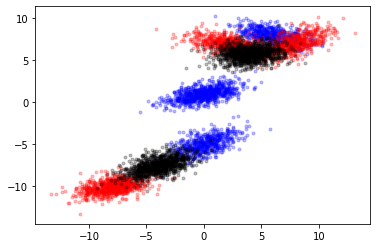

In [59]:
# Plot samples
plt.scatter(samples1[:, 0], samples1[:, 1], marker='.', alpha=0.25, c='b')
plt.scatter(samples2[:, 0], samples2[:, 1], marker='.', alpha=0.25, c='r')
plt.scatter(samples_bary[:, 0], samples_bary[:, 1], marker='.', alpha=0.25, c='k')
plt.show()

In [60]:
barycenter

DeviceArray([[-4.        , -7.5       ,  2.2319188 ,  0.7154857 ,
               0.7154857 ,  0.7848196 ],
             [ 4.000036  ,  5.75      ,  2.2434921 ,  0.1189383 ,
               0.1189383 ,  0.64023054]], dtype=float32)

In [72]:
barycenter[1][0:d]

DeviceArray([4.000036, 5.75    ], dtype=float32)

In [73]:
barycenter.shape

(2, 6)

In [77]:
means = jnp.asarray([barycenter[i][0:d] for i in range(bar_size)])

In [78]:
means

DeviceArray([[-4.      , -7.5     ],
             [ 4.000036,  5.75    ]], dtype=float32)

In [90]:
covariances = jnp.asarray([jnp.reshape(barycenter[i][d:d+d**2], (d, d)) for i in range(bar_size)])

In [91]:
covariances

DeviceArray([[[2.2319188 , 0.7154857 ],
              [0.7154857 , 0.7848196 ]],

             [[2.2434921 , 0.1189383 ],
              [0.1189383 , 0.64023054]]], dtype=float32)

In [68]:
# means = jnp.asarray([barycenter[:,i*d+i*d**2:(i+1)*d+i*d**2] for i in range(bar_size)])